In [1]:
import os

import ndjson
import pandas as pd
import scipy.stats as stats

import src.topicevolution.infodynamics as ntr 
from src.topicevolution.downsampling import import_normalize
from src.ts.granger_causality import main as granger
from src.vis.news_sentiment import adaptiveline_infodynamics, regline

In [2]:
model_path = os.path.join('models', '200826_seed_prior_test')
doctop_path = os.path.join(model_path, 'doctop_mats', '21T_005A_05E_seed_mat.ndjson')

<br>

## Topic usage

Downsample (average topic usage per day)

In [3]:
doctop_avg = import_normalize(doctop_path=doctop_path,
                              train_data_path='data/S4_fb_phrase.ndjson',
                              meta_data_path='data/S1_giveaway_removed.csv')

/home/jan/word-vects/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (8,9,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<br>

## NTR

Use downsampled document-topic matrix

In [4]:
# load doctop mat
with open(doctop_path) as f:
    doctop = ndjson.load(f)

# timestamp
texts_concat_df = pd.read_csv('TMP_downsampled/texts_concat_df.csv')
ids = texts_concat_df['time']

In [5]:
ntr.calculate(
    doc_top_prob=doctop_avg,
    ID=ids,
    window=7,
    out_dir='models/200826_seed_prior_test/ntr/21T_005A_05E_avg',
    curb_incomplete=True,
)

<br>

## Granger

In [3]:
with open('models/200826_seed_prior_test/ntr/21T_005A_05E_avg/7W.ndjson') as f:
    ntr_avg_7 = pd.DataFrame(ndjson.load(f))
    ntr_avg_7.doc_id = pd.to_datetime(ntr_avg_7.doc_id)

In [7]:
ntr_csl_topics = granger(
    df_predictors=ntr_avg_7[['novelty', 'transience', 'resonance']],
    df_outcome=pd.DataFrame(doctop_avg[7:-7])
)

topics_csl_ntr = granger(
    df_predictors=pd.DataFrame(doctop_avg[7:-7]),
    df_outcome=ntr_avg_7[['novelty', 'transience', 'resonance']]
)

[ADF test] df_predictors
novelty : non_stationary
transience : non_stationary
resonance : non_stationary
[ADF test] df_outcome
0 : non_stationary
1 : non_stationary
2 : non_stationary
3 : non_stationary
4 : non_stationary
5 : non_stationary
6 : non_stationary
7 : non_stationary
8 : non_stationary
9 : non_stationary
10 : non_stationary
11 : non_stationary
12 : non_stationary
13 : non_stationary
14 : non_stationary
15 : non_stationary
16 : non_stationary
17 : non_stationary
18 : non_stationary
19 : non_stationary
20 : non_stationary
Checking column novelty ~ 0

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7189  , p=0.0993  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=2.7234  , p=0.0989  , df=1
likelihood ratio test: chi2=2.7214  , p=0.0990  , df=1
parameter F test:         F=2.7189  , p=0.0993  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2555  , p=0.2852  , df_denom=1808, df_num=2
ssr based c

/home/jan/hpv-vaccine/src/ts/granger_causality.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pred"] = df_predictor[col_p].values



ssr based chi2 test:   chi2=2.5308  , p=0.6391  , df=4
likelihood ratio test: chi2=2.5290  , p=0.6394  , df=4
parameter F test:         F=0.6296  , p=0.6414  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.0014  , p=0.4154  , df_denom=1799, df_num=5
ssr based chi2 test:   chi2=5.0377  , p=0.4113  , df=5
likelihood ratio test: chi2=5.0307  , p=0.4121  , df=5
parameter F test:         F=1.0014  , p=0.4154  , df_denom=1799, df_num=5
Checking column novelty ~ 1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4729  , p=0.4918  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=0.4736  , p=0.4913  , df=1
likelihood ratio test: chi2=0.4736  , p=0.4913  , df=1
parameter F test:         F=0.4729  , p=0.4918  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3359  , p=0.7148  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=0.6736  , p=0.7141  , df=2
like

ssr based F test:         F=1.9864  , p=0.1375  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=3.9838  , p=0.1364  , df=2
likelihood ratio test: chi2=3.9794  , p=0.1367  , df=2
parameter F test:         F=1.9864  , p=0.1375  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1234  , p=0.3383  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=3.3832  , p=0.3362  , df=3
likelihood ratio test: chi2=3.3800  , p=0.3367  , df=3
parameter F test:         F=1.1234  , p=0.3383  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4514  , p=0.2146  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=5.8345  , p=0.2119  , df=4
likelihood ratio test: chi2=5.8252  , p=0.2126  , df=4
parameter F test:         F=1.4514  , p=0.2146  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1922  , p=0.3105  , df_denom=1799, df_num=5
ssr based chi2

ssr based chi2 test:   chi2=0.0503  , p=0.8225  , df=1
likelihood ratio test: chi2=0.0503  , p=0.8225  , df=1
parameter F test:         F=0.0503  , p=0.8226  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0638  , p=0.3454  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=2.1334  , p=0.3441  , df=2
likelihood ratio test: chi2=2.1322  , p=0.3444  , df=2
parameter F test:         F=1.0638  , p=0.3454  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8863  , p=0.4475  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=2.6693  , p=0.4455  , df=3
likelihood ratio test: chi2=2.6673  , p=0.4458  , df=3
parameter F test:         F=0.8863  , p=0.4475  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6216  , p=0.6471  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=2.4989  , p=0.6448  , df=4
likelihood ratio test: chi2=2.497

ssr based chi2 test:   chi2=4.0812  , p=0.5378  , df=5
likelihood ratio test: chi2=4.0766  , p=0.5384  , df=5
parameter F test:         F=0.8113  , p=0.5415  , df_denom=1799, df_num=5
Checking column transience ~ 0

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.8520 , p=0.0006  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=11.8717 , p=0.0006  , df=1
likelihood ratio test: chi2=11.8330 , p=0.0006  , df=1
parameter F test:         F=11.8520 , p=0.0006  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.3387  , p=0.0018  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=12.7125 , p=0.0017  , df=2
likelihood ratio test: chi2=12.6681 , p=0.0018  , df=2
parameter F test:         F=6.3387  , p=0.0018  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.8042  , p=0.0006  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=17.4800 , p=0.0006  , df=3
li


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.9453  , p=0.0001  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=23.9001 , p=0.0001  , df=4
likelihood ratio test: chi2=23.7437 , p=0.0001  , df=4
parameter F test:         F=5.9453  , p=0.0001  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=5.9858  , p=0.0000  , df_denom=1799, df_num=5
ssr based chi2 test:   chi2=30.1121 , p=0.0000  , df=5
likelihood ratio test: chi2=29.8644 , p=0.0000  , df=5
parameter F test:         F=5.9858  , p=0.0000  , df_denom=1799, df_num=5
Checking column transience ~ 7

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6450  , p=0.1998  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=1.6478  , p=0.1993  , df=1
likelihood ratio test: chi2=1.6470  , p=0.1994  , df=1
parameter F test:         F=1.6450  , p=0.1998  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F

likelihood ratio test: chi2=2.6717  , p=0.2629  , df=2
parameter F test:         F=1.3331  , p=0.2639  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9444  , p=0.4183  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=2.8442  , p=0.4163  , df=3
likelihood ratio test: chi2=2.8419  , p=0.4166  , df=3
parameter F test:         F=0.9444  , p=0.4183  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9557  , p=0.4308  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=3.8419  , p=0.4278  , df=4
likelihood ratio test: chi2=3.8378  , p=0.4284  , df=4
parameter F test:         F=0.9557  , p=0.4308  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.8242  , p=0.5323  , df_denom=1799, df_num=5
ssr based chi2 test:   chi2=4.1464  , p=0.5285  , df=5
likelihood ratio test: chi2=4.1416  , p=0.5292  , df=5
parameter F test:         F=0.824

ssr based F test:         F=0.8242  , p=0.5323  , df_denom=1799, df_num=5
ssr based chi2 test:   chi2=4.1463  , p=0.5286  , df=5
likelihood ratio test: chi2=4.1415  , p=0.5292  , df=5
parameter F test:         F=0.8242  , p=0.5323  , df_denom=1799, df_num=5
Checking column transience ~ 20

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7503  , p=0.0054  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=7.7632  , p=0.0053  , df=1
likelihood ratio test: chi2=7.7466  , p=0.0054  , df=1
parameter F test:         F=7.7503  , p=0.0054  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5747  , p=0.0282  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=7.1691  , p=0.0277  , df=2
likelihood ratio test: chi2=7.1550  , p=0.0279  , df=2
parameter F test:         F=3.5747  , p=0.0282  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6394  , p=0.0481  , df_den

ssr based F test:         F=1.9711  , p=0.1163  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=5.9362  , p=0.1148  , df=3
likelihood ratio test: chi2=5.9265  , p=0.1152  , df=3
parameter F test:         F=1.9711  , p=0.1163  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6870  , p=0.1503  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=6.7817  , p=0.1479  , df=4
likelihood ratio test: chi2=6.7690  , p=0.1486  , df=4
parameter F test:         F=1.6870  , p=0.1503  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1282  , p=0.3431  , df_denom=1799, df_num=5
ssr based chi2 test:   chi2=5.6757  , p=0.3391  , df=5
likelihood ratio test: chi2=5.6668  , p=0.3400  , df=5
parameter F test:         F=1.1282  , p=0.3431  , df_denom=1799, df_num=5
Checking column resonance ~ 6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9460  , p=0.3309  , df_denom

ssr based F test:         F=1.1203  , p=0.3264  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=2.2467  , p=0.3252  , df=2
likelihood ratio test: chi2=2.2453  , p=0.3254  , df=2
parameter F test:         F=1.1203  , p=0.3264  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7899  , p=0.4994  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=2.3790  , p=0.4976  , df=3
likelihood ratio test: chi2=2.3774  , p=0.4978  , df=3
parameter F test:         F=0.7899  , p=0.4994  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4010  , p=0.0481  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=9.6521  , p=0.0467  , df=4
likelihood ratio test: chi2=9.6265  , p=0.0472  , df=4
parameter F test:         F=2.4010  , p=0.0481  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.0158  , p=0.0736  , df_denom=1799, df_num=5
ssr based chi2

ssr based F test:         F=0.6572  , p=0.4177  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=0.6583  , p=0.4172  , df=1
likelihood ratio test: chi2=0.6582  , p=0.4172  , df=1
parameter F test:         F=0.6572  , p=0.4177  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4075  , p=0.6654  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=0.8173  , p=0.6645  , df=2
likelihood ratio test: chi2=0.8171  , p=0.6646  , df=2
parameter F test:         F=0.4075  , p=0.6654  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3883  , p=0.7614  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=1.1695  , p=0.7603  , df=3
likelihood ratio test: chi2=1.1691  , p=0.7604  , df=3
parameter F test:         F=0.3883  , p=0.7614  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4746  , p=0.7544  , df_denom=1802, df_num=4
ssr based chi2

parameter F test:         F=7.1590  , p=0.0075  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6485  , p=0.0262  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=7.3172  , p=0.0258  , df=2
likelihood ratio test: chi2=7.3025  , p=0.0260  , df=2
parameter F test:         F=3.6485  , p=0.0262  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3045  , p=0.0195  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=9.9520  , p=0.0190  , df=3
likelihood ratio test: chi2=9.9247  , p=0.0192  , df=3
parameter F test:         F=3.3045  , p=0.0195  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6208  , p=0.0334  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=10.5354 , p=0.0323  , df=4
likelihood ratio test: chi2=10.5049 , p=0.0327  , df=4
parameter F test:         F=2.6208  , p=0.0334  , df_denom=1802, df_num=4

Granger Causa

ssr based chi2 test:   chi2=10.2603 , p=0.0059  , df=2
likelihood ratio test: chi2=10.2314 , p=0.0060  , df=2
parameter F test:         F=5.1160  , p=0.0061  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.6299  , p=0.0031  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=13.9435 , p=0.0030  , df=3
likelihood ratio test: chi2=13.8902 , p=0.0031  , df=3
parameter F test:         F=4.6299  , p=0.0031  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4457  , p=0.0082  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=13.8515 , p=0.0078  , df=4
likelihood ratio test: chi2=13.7988 , p=0.0080  , df=4
parameter F test:         F=3.4457  , p=0.0082  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.0897  , p=0.0088  , df_denom=1799, df_num=5
ssr based chi2 test:   chi2=15.5430 , p=0.0083  , df=5
likelihood ratio test: chi2=15.47

ssr based F test:         F=1.0994  , p=0.3333  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=2.2050  , p=0.3320  , df=2
likelihood ratio test: chi2=2.2036  , p=0.3323  , df=2
parameter F test:         F=1.0994  , p=0.3333  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3153  , p=0.2677  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=3.9613  , p=0.2657  , df=3
likelihood ratio test: chi2=3.9570  , p=0.2661  , df=3
parameter F test:         F=1.3153  , p=0.2677  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9851  , p=0.4144  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=3.9599  , p=0.4115  , df=4
likelihood ratio test: chi2=3.9556  , p=0.4121  , df=4
parameter F test:         F=0.9851  , p=0.4144  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.7891  , p=0.1119  , df_denom=1799, df_num=5
ssr based chi2

number of lags (no zero) 1
ssr based F test:         F=1.6820  , p=0.1948  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=1.6848  , p=0.1943  , df=1
likelihood ratio test: chi2=1.6840  , p=0.1944  , df=1
parameter F test:         F=1.6820  , p=0.1948  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8537  , p=0.4260  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=1.7120  , p=0.4248  , df=2
likelihood ratio test: chi2=1.7112  , p=0.4250  , df=2
parameter F test:         F=0.8537  , p=0.4260  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1756  , p=0.3176  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=3.5404  , p=0.3156  , df=3
likelihood ratio test: chi2=3.5370  , p=0.3160  , df=3
parameter F test:         F=1.1756  , p=0.3176  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1032  , p=0.3534  , df_denom=18

likelihood ratio test: chi2=0.4100  , p=0.5220  , df=1
parameter F test:         F=0.4094  , p=0.5224  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3040  , p=0.7379  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=0.6097  , p=0.7372  , df=2
likelihood ratio test: chi2=0.6096  , p=0.7373  , df=2
parameter F test:         F=0.3040  , p=0.7379  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8577  , p=0.4624  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=2.5830  , p=0.4605  , df=3
likelihood ratio test: chi2=2.5812  , p=0.4608  , df=3
parameter F test:         F=0.8577  , p=0.4624  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6711  , p=0.6121  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=2.6977  , p=0.6096  , df=4
likelihood ratio test: chi2=2.6957  , p=0.6100  , df=4
parameter F test:         F=0.671

parameter F test:         F=0.7205  , p=0.6080  , df_denom=1799, df_num=5
Checking column 13 ~ transience

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6490  , p=0.4206  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=0.6501  , p=0.4201  , df=1
likelihood ratio test: chi2=0.6499  , p=0.4201  , df=1
parameter F test:         F=0.6490  , p=0.4206  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7941  , p=0.4522  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=1.5925  , p=0.4510  , df=2
likelihood ratio test: chi2=1.5918  , p=0.4512  , df=2
parameter F test:         F=0.7941  , p=0.4522  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8533  , p=0.1355  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=5.5815  , p=0.1338  , df=3
likelihood ratio test: chi2=5.5729  , p=0.1343  , df=3
parameter F test:         F=1.8533  , p=0.1355  , df_den

ssr based F test:         F=0.1641  , p=0.6855  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=0.1643  , p=0.6852  , df=1
likelihood ratio test: chi2=0.1643  , p=0.6852  , df=1
parameter F test:         F=0.1641  , p=0.6855  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1772  , p=0.8376  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=0.3554  , p=0.8372  , df=2
likelihood ratio test: chi2=0.3554  , p=0.8372  , df=2
parameter F test:         F=0.1772  , p=0.8376  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9848  , p=0.3990  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=2.9659  , p=0.3969  , df=3
likelihood ratio test: chi2=2.9635  , p=0.3973  , df=3
parameter F test:         F=0.9848  , p=0.3990  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7590  , p=0.5520  , df_denom=1802, df_num=4
ssr based chi2

ssr based F test:         F=0.6099  , p=0.5435  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=1.2231  , p=0.5425  , df=2
likelihood ratio test: chi2=1.2227  , p=0.5426  , df=2
parameter F test:         F=0.6099  , p=0.5435  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5839  , p=0.6256  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=1.7586  , p=0.6240  , df=3
likelihood ratio test: chi2=1.7577  , p=0.6242  , df=3
parameter F test:         F=0.5839  , p=0.6256  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4316  , p=0.7859  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=1.7349  , p=0.7844  , df=4
likelihood ratio test: chi2=1.7341  , p=0.7845  , df=4
parameter F test:         F=0.4316  , p=0.7859  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.1778  , p=0.3176  , df_denom=1799, df_num=5
ssr based chi2

ssr based F test:         F=1.1981  , p=0.3020  , df_denom=1808, df_num=2
ssr based chi2 test:   chi2=2.4028  , p=0.3008  , df=2
likelihood ratio test: chi2=2.4012  , p=0.3010  , df=2
parameter F test:         F=1.1981  , p=0.3020  , df_denom=1808, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5053  , p=0.2113  , df_denom=1805, df_num=3
ssr based chi2 test:   chi2=4.5333  , p=0.2093  , df=3
likelihood ratio test: chi2=4.5277  , p=0.2098  , df=3
parameter F test:         F=1.5053  , p=0.2113  , df_denom=1805, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9033  , p=0.1073  , df_denom=1802, df_num=4
ssr based chi2 test:   chi2=7.6514  , p=0.1052  , df=4
likelihood ratio test: chi2=7.6353  , p=0.1059  , df=4
parameter F test:         F=1.9033  , p=0.1073  , df_denom=1802, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.4166  , p=0.0341  , df_denom=1799, df_num=5
ssr based chi2

In [8]:
ntr_csl_topics

,Outcome,Predictor (Topic),Significance (p<0.01),maxlag
0,novelty,6,0.0001,2
1,novelty,6,0.0000,3
2,novelty,6,0.0000,4
3,novelty,6,0.0000,5
4,novelty,15,0.0025,1
5,transience,0,0.0006,1
6,transience,0,0.0017,2
7,transience,0,0.0006,3
8,transience,0,0.0010,4
9,transience,0,0.0024,5


In [9]:
topics_csl_ntr

,Outcome,Predictor (Topic),Significance (p<0.01),maxlag
0,1,resonance,0.0074,1
1,4,novelty,0.0059,2
2,4,novelty,0.0030,3
3,4,novelty,0.0078,4
4,4,novelty,0.0083,5
5,4,transience,0.0032,3
6,4,transience,0.0022,4
7,4,transience,0.0051,5
8,7,novelty,0.0092,3
9,7,transience,0.0012,3


<br>

### Vis

In [4]:
adaptiveline_infodynamics(
    x1=ntr_avg_7.novelty,
    x2=ntr_avg_7.resonance,
    dates=ntr_avg_7.doc_id,
    dataset_name='Facebook',
    plot_label='Infodynamics',
    c=['mistyrose', 'indianred', 'darkred'],
    normalize_signal=True,
    filter_span=[32, 56, 128],
    my_dpi=300,
    fname=os.path.join(model_path, 'timeseries', 'adaptline_NR_norm.png')
)

adaptiveline_infodynamics(
    x1=ntr_avg_7.novelty,
    x2=ntr_avg_7.resonance,
    dates=ntr_avg_7.doc_id,
    dataset_name='Facebook',
    plot_label='Infodynamics',
    c=['mistyrose', 'indianred', 'darkred'],
    normalize_signal=False,
    filter_span=[32, 56, 128],
    my_dpi=300,
    fname=os.path.join(model_path, 'timeseries', 'adaptline_NR_raw.png')
)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


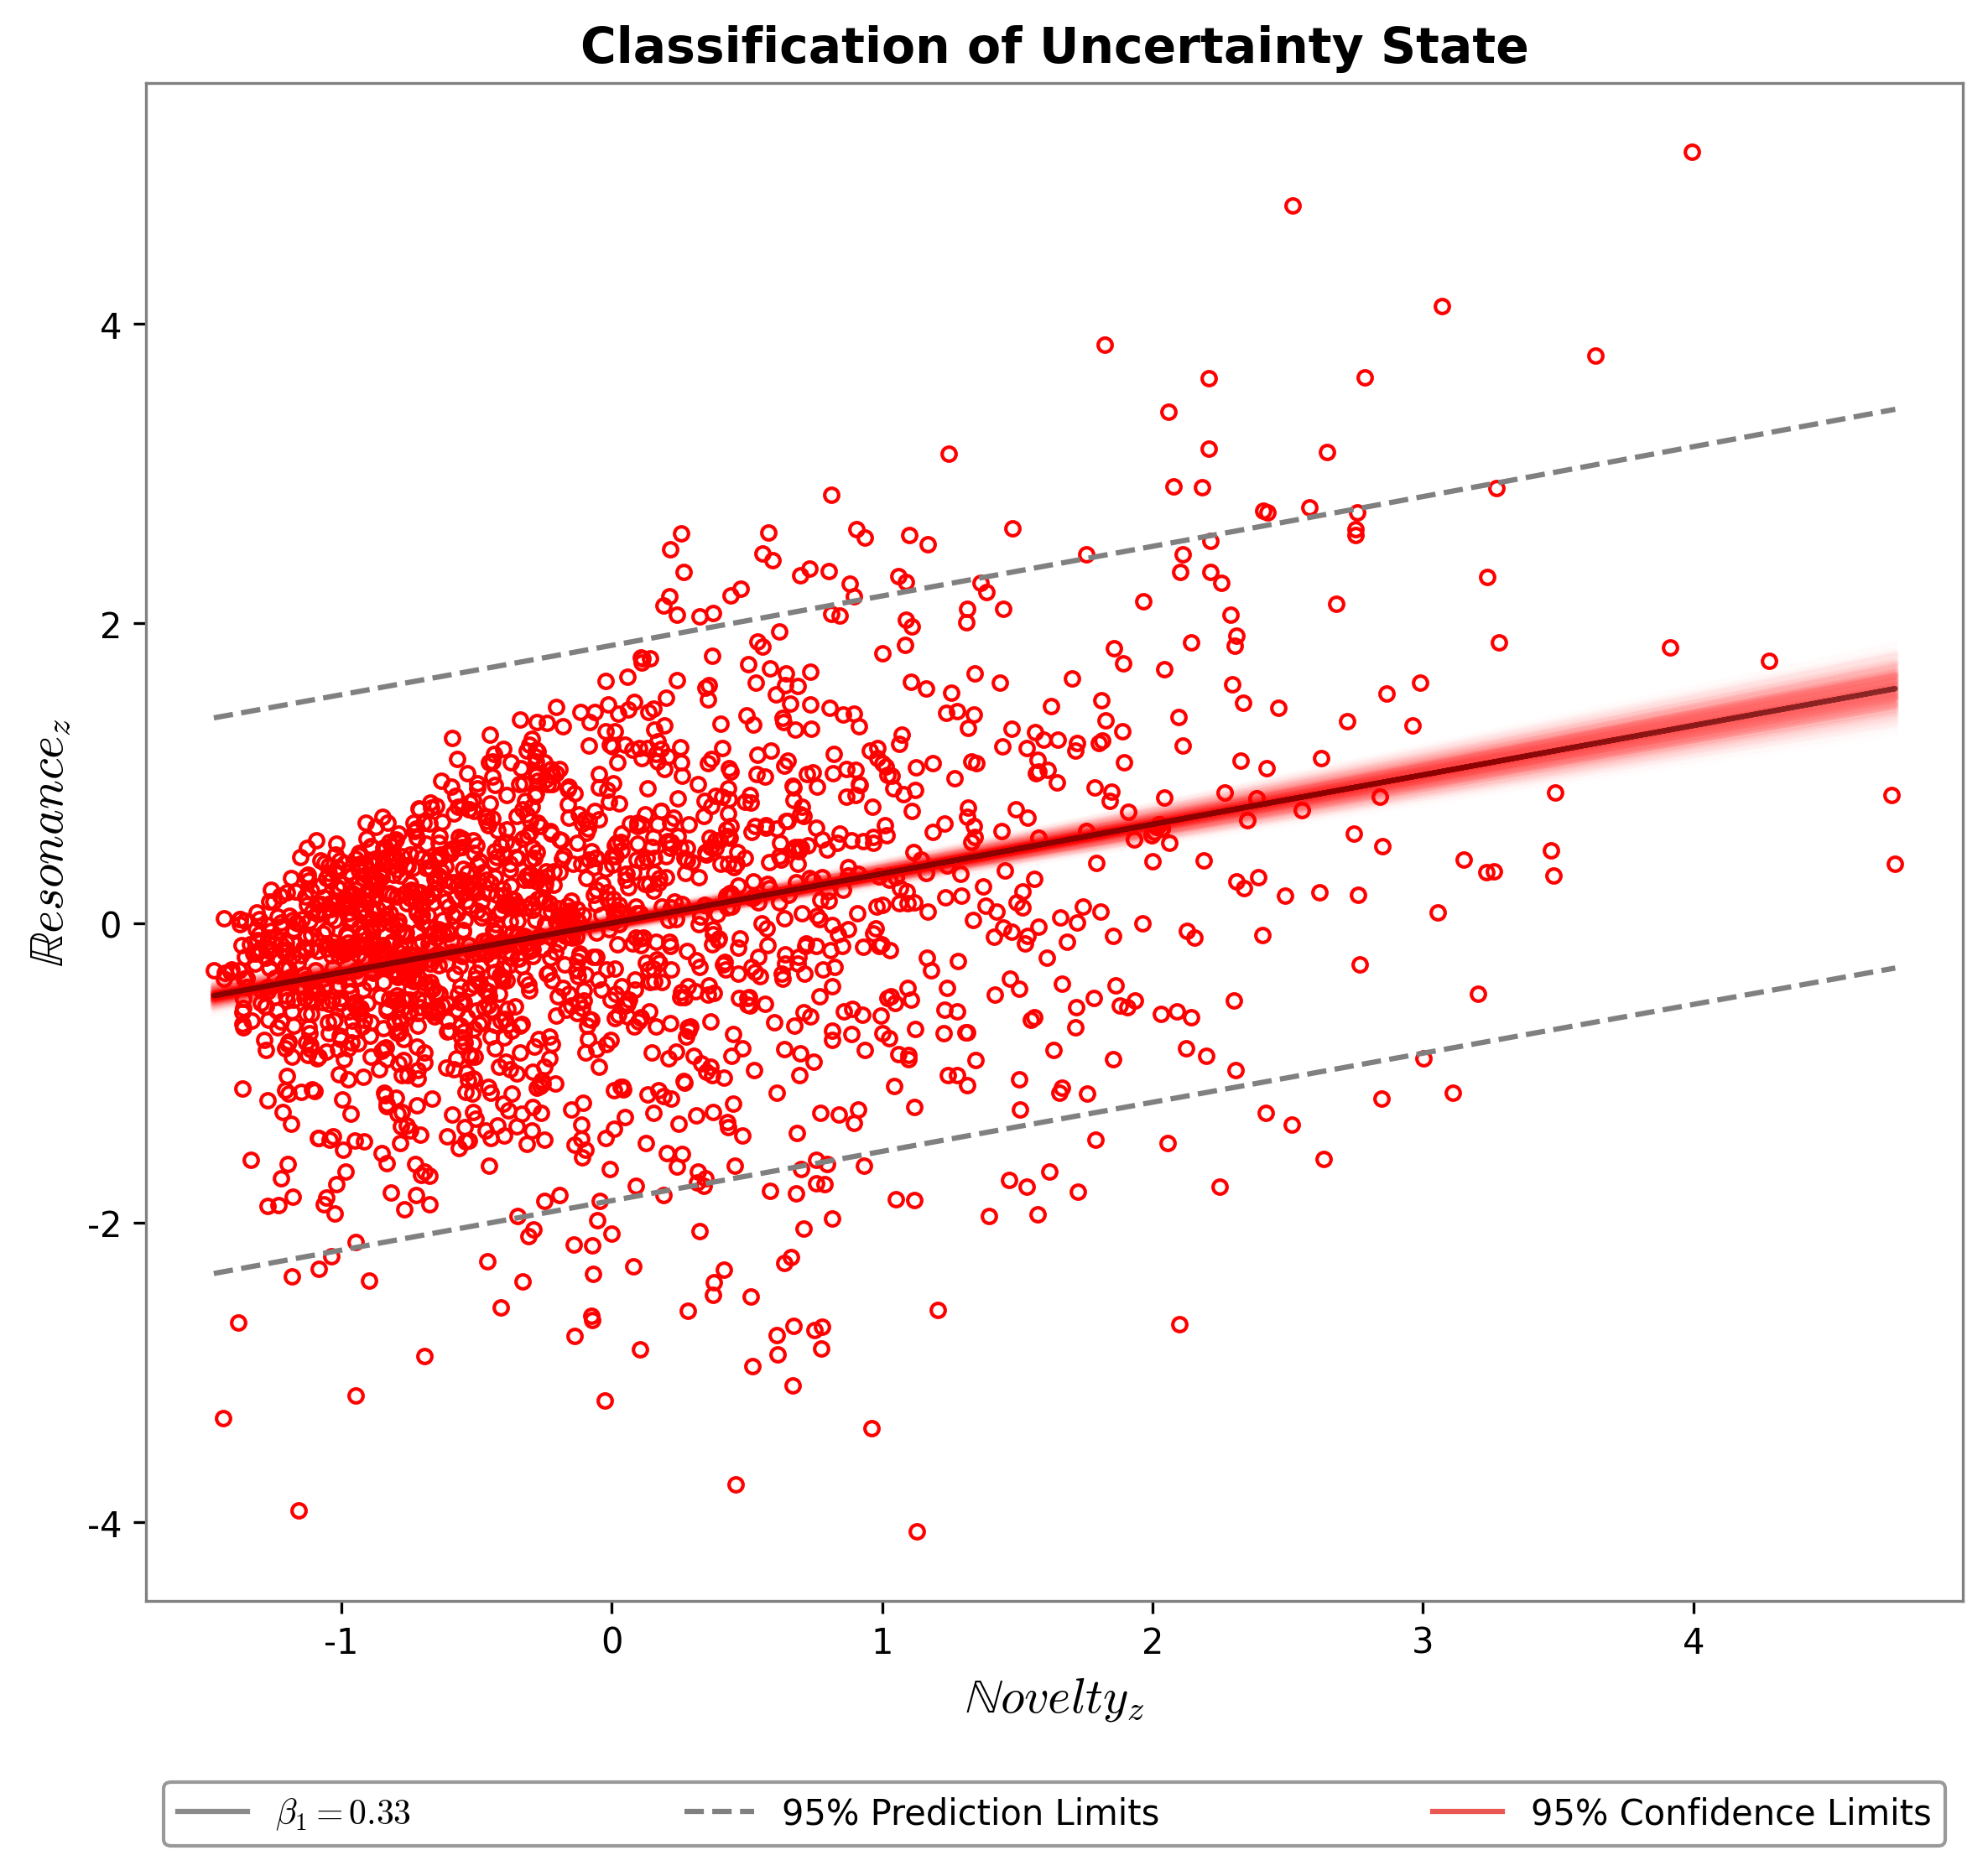

In [11]:
regline(
    x=stats.zscore(ntr_avg_7.novelty),
    y=stats.zscore(ntr_avg_7.resonance),
    bootstap=True,
    fname=os.path.join(model_path, 'timeseries', 'regline_NR.png')
)